<a id='top'></a>
# Table of Contents
 1 [Objective](#Objective)<br>
 2 [Loading the Data](#Load)<br>
 3 [Data Sanitization](#datas)<br>
 4 [Exploratory Analysis](#ea)<br>
 5 [Splitting The Data](#split)<br>
 6 [Model Building](#mb)
   -  6.1 [Logistic Regression](#lr) 
   -  6.2 [Decision tree](#dtree) 

<a id='Objective'></a>
## Objective : From a given dataset of meausrement of Breast Cancer Cells predict whether each cell is *malignant or benign*

### Import the Libraries

In [2]:
import numpy as np #array manipulations
import pandas as pd  # high level data structure manipulation and other data analysis operation
import matplotlib.pyplot as plt # data visualization
import os # operating system functionality
import math # math operation
from sklearn import linear_model,metrics,tree # building statistical models 
from sklearn import model_selection,cross_validation # for test train split , cross validation and related functionality
from IPython.display import SVG # to show graphs in Notebook
import graphviz # render graphs  
%matplotlib inline  

C:\Users\Shantam Gupta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


 ### Checking the Current Working Directory

In [3]:
path = os.getcwd()

If the above file location is different from where your current files 

Either

1) Move the file to the current path location or 

2) Alter the above path and set its to the location of the folder containing the relevant files


<a id='Load'></a>
### Loading the Data files
For this task we have been provided with two files. The first file contains measurements of Breast Cancer Cells and the second file contains the header for this file

In [3]:
#open the header txt file
header = open("data/field_names.txt","r")

#read the lines from the text file and split each one in a new line
header_line = header.read().splitlines()
header_line

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [4]:
#load the breast cancer measurement csv file and set the column names to the filed names stored above(header_line)
data = pd.read_csv("data/breast-cancer.csv",names=header_line)

#print the top 5 rows the head()
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id='datas'></a>
### Data Sanitization
####  Data Type validation

In [5]:
#checking the type of data object 
type(data)

pandas.core.frame.DataFrame

In [6]:
#looking at type of the data to ensure data type validation of columns
data.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [7]:
#converting ID to object  using astype explicit data type conversion
data.ID = data.ID.astype('object')

#converting diagnosis to nominal categorical data type (there is no order between malignant or benign hence specify ordered = False as a parameter)
data.diagnosis = pd.Categorical(data.diagnosis,ordered = False)

#check the data types after conversion
data.dtypes

ID                              object
diagnosis                     category
radius_mean                    float64
radius_sd_error                float64
radius_worst                   float64
texture_mean                   float64
texture_sd_error               float64
texture_worst                  float64
perimeter_mean                 float64
perimeter_sd_error             float64
perimeter_worst                float64
area_mean                      float64
area_sd_error                  float64
area_worst                     float64
smoothness_mean                float64
smoothness_sd_error            float64
smoothness_worst               float64
compactness_mean               float64
compactness_sd_error           float64
compactness_worst              float64
concavity_mean                 float64
concavity_sd_error             float64
concavity_worst                float64
concave_points_mean            float64
concave_points_sd_error        float64
concave_points_worst     

Apart from ID and Diagnosis all other columnns are representative of measurement hence the data type float is quite apt for their use

#### Checking for empty or missing values in the data

In [8]:
#check if any value in the data frame is null or missing
#print(data.isnull())

#the above exercise can be tedious if the dataset is large. To check if any columns have any missing value
#print(data.isnull().any())

#A faster way to check this
#print(data.isnull().values.any())

#Check  if any number is read incorrecctly as nan (not a number, e.g. 0/0, 1/0 etc.) this opereation can only be performed on numbers. Use the similiar logic to check as defdined above using any() 
print(np.isnan(data.loc[:,'radius_mean':'fractal_dimension_worst' ].any().any()))


#Note : Remove the comment(#) before the print statement(as done for above line) and check the output
#also see help(any) to understand how it can be effectively used for boolean operations

False


None of the data values are missing or nans and hence we are good to proceed further

#### Descriptive Statistics

In [9]:
data.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The mean and median smoothness of Malignant category cells on an average (in the given dataset) is  greater than the mean and median smoothness of Bening Category Cells. This possibly indicates that Mean Smoothness could be an import predictor/variable/feature for differentiating between the two categories.

<a id = "ae"></a>
### Exploratory Analysis

#### Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.

In [13]:
#separting the data by categories for visuliazation puprose
data_M = data[data['diagnosis']=='M']
data_B = data[data['diagnosis']=='B']

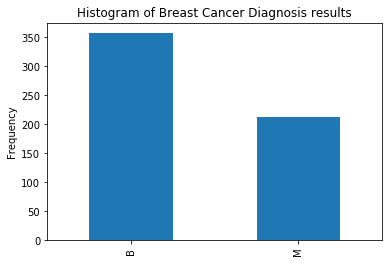

In [14]:
#Histogram of Class frequencies of Breast Cancer Diagnosis.
data.diagnosis.value_counts().plot(kind ='bar')
plt.title("Histogram of Breast Cancer Diagnosis results")
plt.ylabel("Frequency")

**The prior of classes(categories) play an important role on the performance of a classifier**


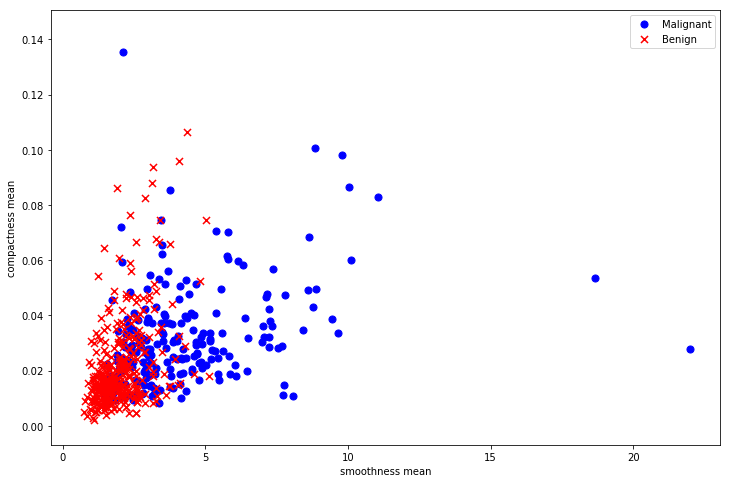

In [15]:
#randomly choosing columns smoothness mean and compactness_mean to plot on 2-D axis for visual exploration

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_M['smoothness_mean'], data_M['compactness_mean'], s=50, c='b', marker='o', label='Malignant')
ax.scatter(data_B['smoothness_mean'], data_B['compactness_mean'], s=50, c='r', marker='x', label='Benign')
ax.legend()
ax.set_xlabel('smoothness mean')
ax.set_ylabel('compactness mean')

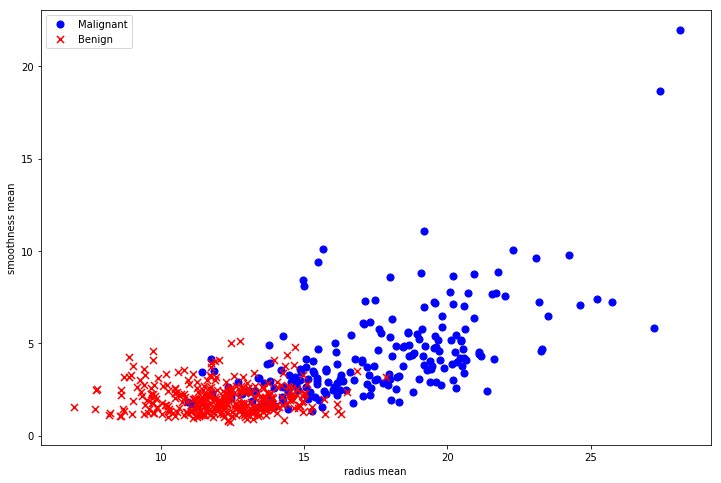

In [16]:
#randomly choosing columns radius mean and smoothness mean to plot on 2-D axis for visual exploration

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_M['radius_mean'], data_M['smoothness_mean'], s=50, c='b', marker='o', label='Malignant')
ax.scatter(data_B['radius_mean'], data_B['smoothness_mean'], s=50, c='r', marker='x', label='Benign')
ax.legend()
ax.set_xlabel('radius mean')
ax.set_ylabel('smoothness mean')

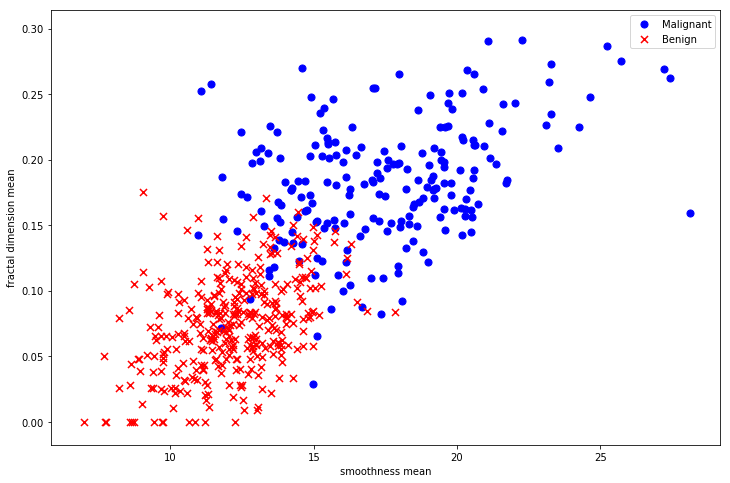

In [17]:
#randomly choosing columns radius mean and fractal dimension mean to plot on 2-D axis for visual exploration

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_M['radius_mean'], data_M['fractal_dimension_mean'], s=50, c='b', marker='o', label='Malignant')
ax.scatter(data_B['radius_mean'], data_B['fractal_dimension_mean'], s=50, c='r', marker='x', label='Benign')
ax.legend()
ax.set_xlabel('smoothness mean')
ax.set_ylabel('fractal dimension mean')

From the above plots it is quite evident that compactness mean and smoothness mean can be used to chart a separable boundary between Malignant and Benign type of Cancer.

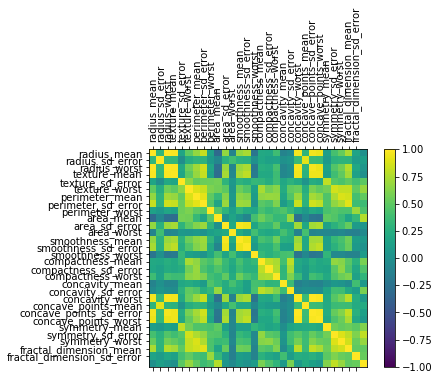

In [18]:
#Create a Correlation plot between numeric features 
correlation = data.corr()
#print(pd.DataFrame(correlation))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,29,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns[2:],rotation = 90)
ax.set_yticklabels(data.columns[2:])
plt.show()

Radius_mean is highly correlatedd with texture mean, radius worst,concavity_worst, concave points-sd error, etc. The above plot can be helpful in feature selection. It can help to prevent multicollinearity in linear models.

<a id='split'></a>
### Splitting of Test and Train Data 

Taking 70% of the available data as the train data and  30% as test data 

In [19]:
#splitting the data into test and train
#for this split we assume all the numerical features(taking a full scale additive model) as independent variable and Diganosis as the dependent binary categorical variable
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.loc[:,'radius_mean':], data['diagnosis'], test_size=0.3, random_state=0)

In [20]:
#looking at the dimesnions of the test and train data dependent variables and independent variables 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

<a id='mb'></a>
### Model Building 

We shall use the Logit  and Decision Tress Classifier for the purpose of our analyis. (Logistic Regression belongs to a family of generalised linear models where as Decision Trees are non parametric model)

<a id='lr'></a>
### Model 1.  Logistic Regression 

Logistic Regression are a type of regresion model where the dependent variable is categorical. In these types of models
we calculate the natural log of odds of class probabilities as a function of linear combination of independent variables. The class probabilities can be caculated from the formula below. 

#### Logit Function

logit is log of of odd's ratio. 

Odds' ratio is the ratio of probability of success to failue. Here it reflects the probability of Bening type of Caner Cell to Malignant Type of Cancer Cell


<img src= "logit.png">



In [21]:
#fitting the model on train data
model_log = linear_model.LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#lets look at the coefficients to identify the ones are important
pd.DataFrame(list(zip(x_train.columns,np.transpose(model_log.coef_))))

,0,1
0,radius_mean,[-1.70710281802]
1,radius_sd_error,[-0.107616790861]
2,radius_worst,[-0.0874010129088]
3,texture_mean,[0.00672901063862]
4,texture_sd_error,[0.124733105678]
5,texture_worst,[0.325280961818]
6,perimeter_mean,[0.50381484364]
7,perimeter_sd_error,[0.263108156184]
8,perimeter_worst,[0.247641034584]
9,area_mean,[0.020979458427]


Increase in symmetry_worst, symmmetry_sd_error are likely to increase in likelihood of having Bening Cancer Type. The radius mean and concavity worst might are likely to increase the likelihood of Malignant Cancer Type. 
The above coefficients reflect the chnages in the value of the logit by a unit change in the value of  a predictor. For e.g. a unit change in symmetry worst would cause the log of odds to change by 0.999 units.This reflects the potential of symmetry worst to affect the logit. 

Note : From the correlation matrix we know that symmetry_worst and symmmetry_sd_error are highly correlated to each other. We might have to try different variants of the model with/without the above two features to ascertain how they are affecting the logit classifier

In [23]:
#evaluating the fitness of model on train data itself
model_log.score(x_train,y_train)

0.957286432160804

The model fits quite well on the train data

In [24]:
#evaluating the class labels for test data
y_predicted_log = model_log.predict(x_test)
y_prob_predicted_log = model_log.predict_proba(x_test)
print (y_predicted_log)
print(y_prob_predicted_log)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B']
[[  7.25150598e-03   9.92748494e-01]
 [  9.68493582e-01   3.15064176e-02]
 [  9.97058715e-01   2.94128519e-03]
 [  7.95618352e-01   2.04381648e-01]
 [  9.99888909e-01   1.11090792e-04]
 [  9.96226483e-01   3.77351722e-03]
 [  9.90132891e-01   9.86710890e-03]
 [  9.97823314e-01   2.17668642e-03]
 [  9.585

In [25]:
#looking at the accuracy and ROC AUC metrics
print(metrics.accuracy_score(y_test,y_predicted_log))

0.964912280702


The classification accuracy on test data is quite high too. However, accuracy is one of the many metrics to asses a classification model. For full scale evualtion of the classifier we have to look at the Receiver Operator Curve and confusion matrix.

In [26]:
#Calculating the Area Under the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_predicted_log[:,1],pos_label= "M")
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.996179


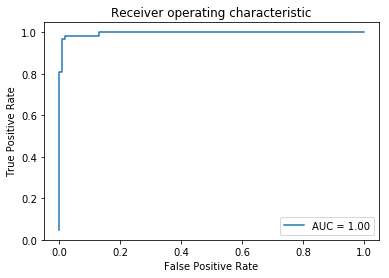

In [27]:
# Plotting ROC Curve
plt.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic')

In [28]:
#Confusion Matrix and Classification report
print('confusion Matrix\n',metrics.confusion_matrix(y_test, y_predicted_log))
print('\n Classification report\n', metrics.classification_report(y_test, y_predicted_log))

confusion Matrix
 [[103   5]
 [  1  62]]

 Classification report
              precision    recall  f1-score   support

          B       0.99      0.95      0.97       108
          M       0.93      0.98      0.95        63

avg / total       0.97      0.96      0.97       171



#### Inferences from Logistic Regression Model

The prediction accuracy of the logit model is 96.5 %. The Area under ROC Curve is 1. These are strongly indicative of the strength of the  logit classifier. (Though there is always remove for improvement)

#### Advantages of Logistic Regression

1.) Allows exploitation of properties of Regression.

2.) Easy to familiarise with.

3.) Gets rid of most assumptions of regression models like homogenity of variance, normal distribution of errors etc.

4.) Capable of adding non-linear boundary

5.) Doesn't require the predictor space to follow a particular distribution.

#### Disadvantages of Logistic Regression

1.) Unsuitable for handling complex non linear decision boundaries

2.) Multicollinearity can pose a threat(However you can tackle this by Regularization)

#### What More could be done

1.) Perform Variable selection and try building different logit models other than the full scale additive model.(Could also try building model using interactive features)

2.) Add and cross validate regularisation to the the Logit Classifier.

3.) Perfrom K-Fold Cross validation to evaluate the strength of the model. This will help to provide a more robust and reliable solution

4.) Add a validation set and verify 


<a id='dtree'></a>
### Model 2.  Decision Tree Classifier

This method involves stratifying or segmenting the predictor space into a number of regions based on certain splitting criteria. These splitting rules can be framed in shape of a tree to reach the final output. Recursive Binary Splitting is done to grow a tree and create different regions.
They can be used for both Regression and Classification tasks. 

For classification task Gini Impurity or Cross Entropy error metric to decide the splitting criteria for each region.


<img src="cart.png">

Source : [Scikit Learn-Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

In [29]:
#building the decision tree classification model and fitting it on x_train and y_train
model_dtree = tree.DecisionTreeClassifier(criterion= "gini",random_state= 10).fit(x_train,y_train)

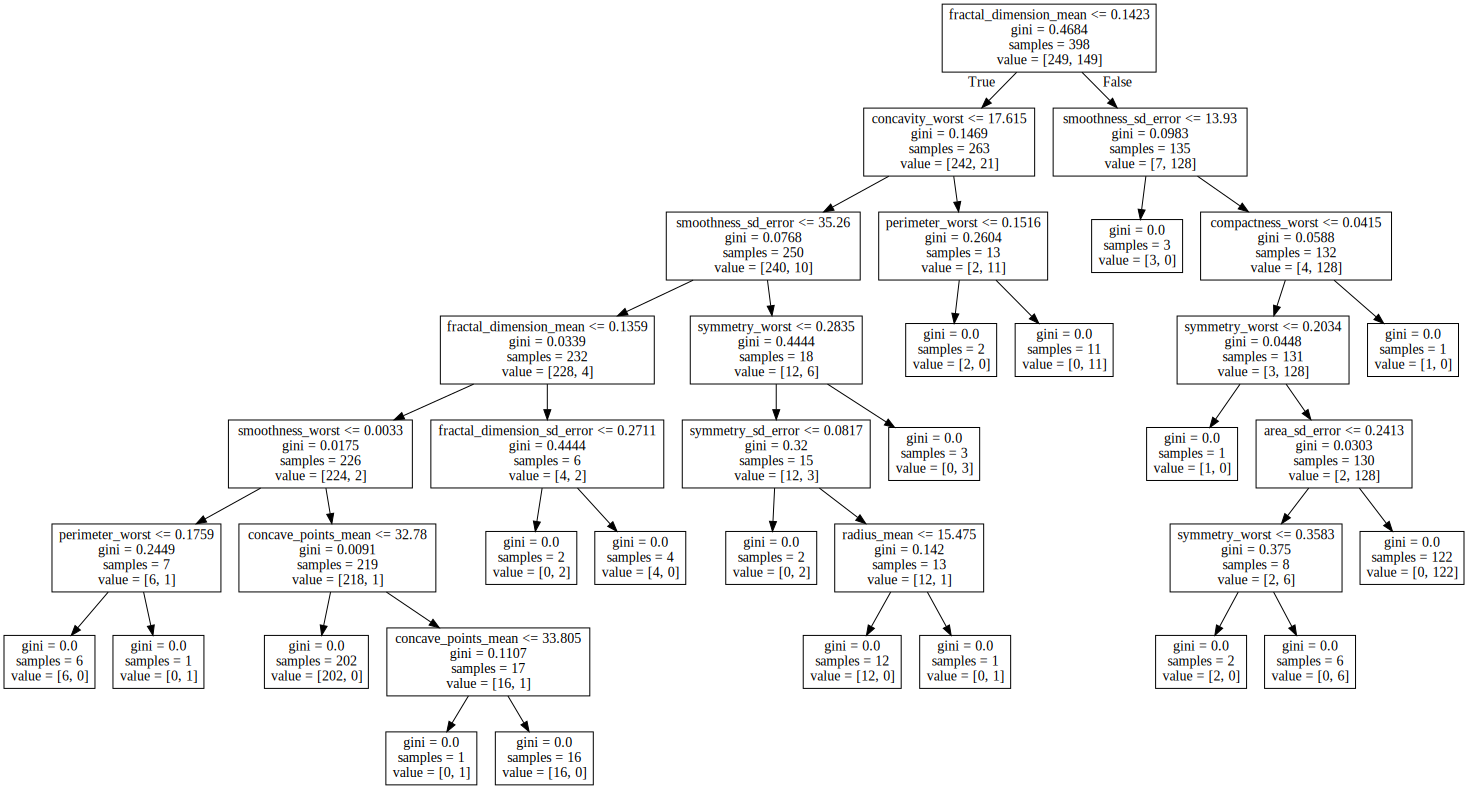

In [30]:
#charting the tree (based on gini impurity) to view the splits at root node, leaf nodes and the branches
graph = graphviz.Source( tree.export_graphviz(model_dtree, out_file=None, feature_names=x_train.columns))
SVG(graph.pipe(format='svg'))

The above plot indicates that fractal dimension mean is root node. This mean that it is an important variable for the classifier. Since, We are not controlling the length of the tree it has grown many leaf nodes and found a perfect split for both the classes for the given train data. 

In [31]:
#looking at the important variables based on above splititng
Var_imp = pd.DataFrame(model_dtree.feature_importances_, index=x_train.columns, 
                          columns=["Var_imp"])
Var_imp.sort_values(['Var_imp'],ascending= False)

,Var_imp
fractal_dimension_mean,0.728114
concavity_worst,0.086151
smoothness_sd_error,0.047493
symmetry_worst,0.043576
perimeter_worst,0.027349
symmetry_sd_error,0.015844
fractal_dimension_sd_error,0.014303
concave_points_mean,0.010678
compactness_worst,0.010164
radius_mean,0.009902


([<matplotlib.axis.XTick at 0x270f5361208>,
 <a list of 30 Text xticklabel objects>)

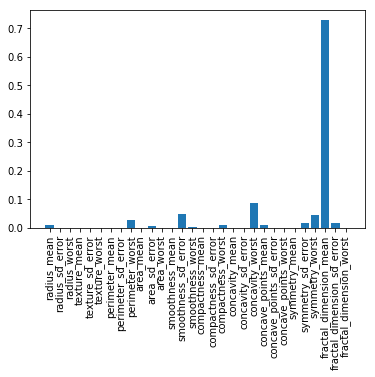

In [32]:
#impoortant features/variables
plt.bar(range(len(model_dtree.feature_importances_)),model_dtree.feature_importances_)
ticks = np.arange(0,len(Var_imp))
plt.xticks(ticks,Var_imp.index.values,rotation='vertical')

The above variable important plot indicates that fractal dimension mean is the most important feature for splitting the data followed by concavity worst,smoothness mean, symmetry worst,smoothness sd error, permiter worst. etc
The rest of the eighteen features(out of the total 30 features) are not at all used by this classifier in the splitting criteria.


In [33]:
#predicting on test data 
y_predicted_dtree =model_dtree.predict(x_test)
y_prob_predicted_dtree = model_dtree.predict_proba(x_test)
print(y_predicted_dtree)
#print(y_prob_predicted_dtree)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B']


In [ ]:
#acuuracy of the classifier is 
print("The accuracy of the classifier is ", metrics.accuracy_score(y_test,y_predicted_dtree)*100)

This accuracy is quite high for test data.

Let's check out the ROC - Curve and Confusion Matrix for better evaluating the results.

In [ ]:
#Calculating the Area Under the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_predicted_dtree[:,1],pos_label= "M")
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

In [ ]:
# Plotting ROC Curve
plt.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic')

In [ ]:
#Confusion Matrix and Classification report
print('confusion Matrix\n',metrics.confusion_matrix(y_test, y_predicted_dtree))
print('\n Classification report\n', metrics.classification_report(y_test, y_predicted_dtree))

#### Inferences from the Decision Tree Classification Model

The accuracy of the decision tree classifier is 91.22 and the area under the ROC- Curve is 91.7. Though these values seem high(greater than 90 %) the decision tree classifier performs poorly when compared to the logit classifier. Since we are not pruning the decision trees it migh be possible that the decision tree classifier overfits on the train(100% accurate partitioning between classes). There is a lot of scope for imporvement!

#### Advantages of Decision Trees 

1.) Easy to Understand and visualize

2.) No feature selection needed. Can also handle both Numerical and Categorical Data

3.) Can be used for Regression and Classification

4.) Faster to Compute compared other ensemble learning methods like Random Forest.

#### Disadvantages of Decision Trees

1.) They don't generalise the data well and can create complex structures that might overfit on train data

2.) They might not provide robust solutions as the splitting criteria is based on greedy algorithm which might not lead to global optimum and hence ensemble methods are preferred.

3.) Small variation in the data can greatly affect the results of this classifier

####  What more could have been done

1.) Try pruning the decision tree to prevent overfitting on train 

2.) A single tree may sometimes provide unreliable solutions. Hence, other classifiers like random forest should be tried to proivde more robuts solutions.

3.) Cross validate the pruning coefficient using a Grid Search or techniques like K- Fold cross validation

4.) Add a validation set

[Go to the Top of the Page : ](#top)